In [33]:
#Importing All libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#Loading the data to create out dataframe
dataset = pd.read_csv("C:/Users/610063/Downloads/Hex Software Internship/Task 1 Week (30th Dec - 05 Jan 2025)/Housing prices dataset/Housing.csv")

In [35]:
dataset.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [36]:
dataset.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [37]:
dataset.shape

(545, 13)

In [39]:
#Checking and dropping duplicates if any
dataset.drop_duplicates(inplace=True)

In [40]:
dataset.shape

(545, 13)

In [41]:
#No column has been deleted as they are all significant in our analysis for building the model

In [42]:
#Check if there are missinng values in our dataset or null values
dataset.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [43]:
# Displaying the statistics for the data
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Axes: ylabel='area'>

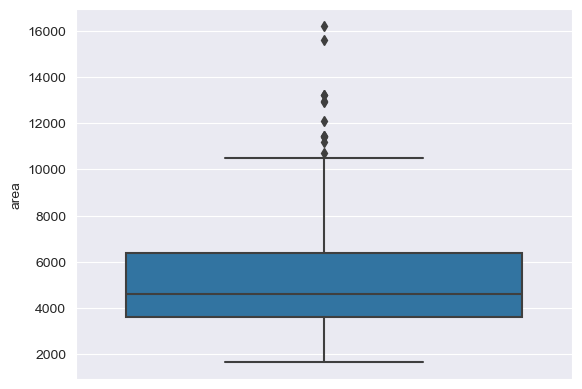

In [44]:
#Check for outliers for the area column
sns.set_style('darkgrid')
sns.boxplot(dataset,y = 'area')


In [45]:
#Handling ouliers for the area variable
q1 = dataset['area'].quantile(0.25)
q3 = dataset['area'].quantile(0.75)

def IQR_for_area():
    q1 = dataset['area'].quantile(0.25)
    q3 = dataset['area'].quantile(0.75)
    iqr = q3-q1
    return iqr

In [47]:
#Calculating limits
upper_limit = q3 + (1.5*IQR_for_area())
lower_limit = q1 - (1.5*IQR_for_area())


In [50]:
#Creating a new data frame without outliers
new_dataset = dataset.loc[(dataset['area'] < upper_limit) & (dataset['area'] > lower_limit)]

In [52]:
new_dataset.shape

(530, 13)

In [54]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [56]:
#For ML model to work we need to convert categorical columns to numerical values
cat_col = new_dataset.select_dtypes('object').columns.tolist()
cat_col

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [58]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False,handle_unknown='ignore')
encoder.fit(new_dataset[cat_col])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [60]:
encoded_cols = encoder.get_feature_names_out(cat_col)

In [61]:
encoded_cols

array(['mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype=object)

In [63]:
new_dataset[encoded_cols] = encoder.transform(new_dataset[cat_col]) 

In [64]:
new_dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,yes,no,yes,no,no,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,1767150,2400,3,1,1,no,no,no,no,no,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,1750000,3620,2,1,1,yes,no,no,no,no,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,1750000,2910,3,1,1,no,no,no,no,no,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [65]:
#After converting categorical values to numerical ones, we delete those not numerical
new_dataset.drop(columns = cat_col,inplace=True)


In [66]:
new_dataset.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,12215000,7500,4,2,2,3,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [67]:
#Dividing the data into to input and output set
new_dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [75]:
X = new_dataset.drop(columns = 'price')
y = new_dataset['price']

In [69]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,8960,4,4,4,3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,9960,3,2,2,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7500,4,2,2,3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,7420,4,1,2,2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,2400,3,1,1,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,3620,2,1,1,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,2910,3,1,1,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [70]:
Y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 530, dtype: int64

In [72]:
#Converting all the input values to one standard scale, performing data standardization
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [73]:
X[:] = scaler.transform(X)

In [74]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.662457,0.6,0.333333,0.666667,0.666667,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.839265,0.6,1.000000,1.000000,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.954076,0.4,0.333333,0.333333,0.666667,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.671642,0.6,0.333333,0.333333,1.000000,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.662457,0.6,0.000000,0.333333,0.666667,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.154994,0.2,0.000000,0.000000,0.666667,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,0.086108,0.4,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,0.226177,0.2,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,0.144661,0.4,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [76]:
#Dividing the data into the training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [77]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((424, 20), (106, 20), (424,), (106,))

In [79]:
#Training the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) #fitting the training set in out odel

LinearRegression()

In [82]:
#Performing some predictions using our fitted model
y_pred = model.predict(X_test)

y_test[:5] # These are original values 


151     5565000
413     3430000
6      10150000
348     3815000
336     3920000
Name: price, dtype: int64

In [83]:
y_pred[:5] # values predicted by the model 

array([5642778.92344016, 4675920.75138506, 9664556.40316991,
       3826751.15112132, 5599973.29595738])

In [85]:
# Evaluating the fitted model 
from sklearn.metrics import mean_absolute_error

In [86]:
mean_absolute_error(y_test,y_pred)

903371.6678819952

In [88]:
#Reducing the error
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha= 50, max_iter=100,tol=0.1)
lasso_model.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [89]:
lasso_pred = lasso_model.predict(X_test)

In [90]:
mean_absolute_error(y_test,lasso_pred)

903457.095412933

In [91]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha= 50, max_iter=100,tol=0.1)
ridge_model.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [92]:
ridge_pred = ridge_model.predict(X_test)

In [93]:
mean_absolute_error(y_test,ridge_pred)

927046.5127861403

In [ ]:
# The normal regression model is doing  better in predicting the outcome or the response variable